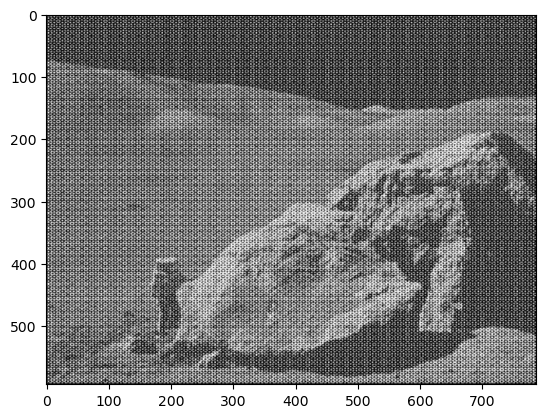

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

img = cv2.imread('periodic_noise_1.JPG', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

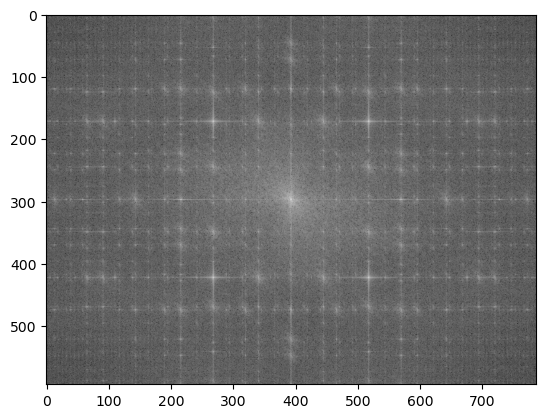

In [31]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(shift[:,:,0],shift[:,:,1]))
plt.imshow(magnitude_spectrum, cmap='gray')

/tmp/ipykernel_131996/906173240.py:12: RuntimeWarning: divide by zero encountered in log
  filtered_mr = 20*np.log(cv2.magnitude(shift[:,:,0],shift[:,:,1]))


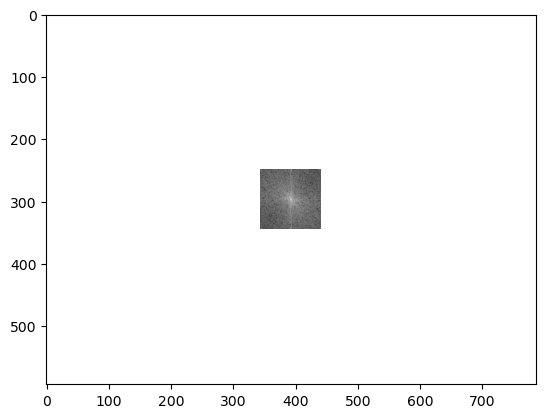

In [32]:
#sigma = 30
#n, m = img.shape
#x, y = np.meshgrid(np.arange(0, m, 1), np.arange(0, n, 1))

mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
constanto = 50
mask[centerX-constanto:centerX+constanto, centerY - constanto:centerY+constanto,:] = 1

shift = shift * mask

filtered_mr = 20*np.log(cv2.magnitude(shift[:,:,0],shift[:,:,1]))
plt.imshow(filtered_mr, cmap='gray')

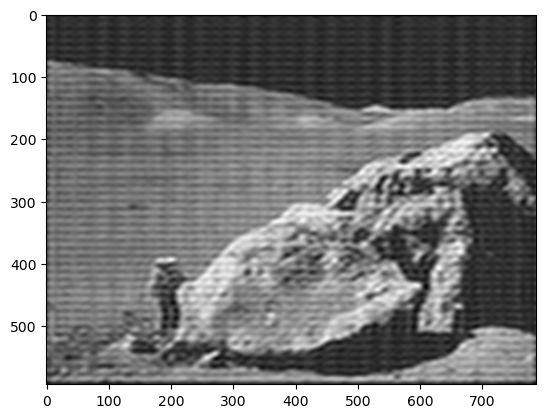

In [33]:
f_shift = np.fft.ifftshift(shift)
img_back = cv2.idft(f_shift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.imshow(img_back, cmap='gray')

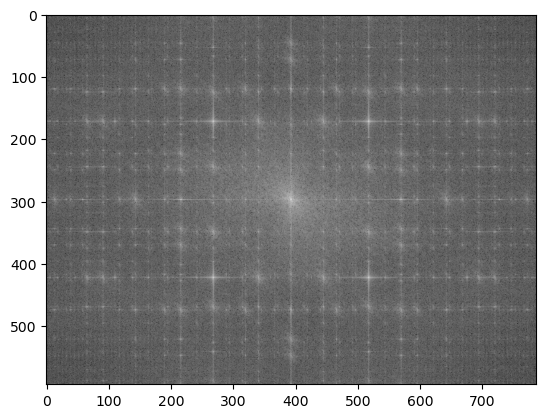

In [34]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(shift[:, :, 0], shift[:, :, 1]))
plt.imshow(magnitude_spectrum, cmap='gray')

/tmp/ipykernel_131996/41145693.py:18: RuntimeWarning: divide by zero encountered in log
  filtered_mr = 20*np.log(cv2.magnitude(shift[:,:,0],shift[:,:,1]))


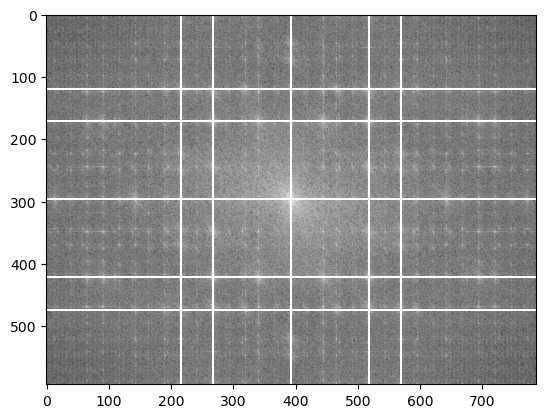

In [35]:
local_max = peak_local_max(magnitude_spectrum, min_distance=7, threshold_abs=300)

n, m = img.shape
mask = np.copy(shift)
mask[:, :, :] = 1

#thickness = 2
#color = (0, 0, 0)

for point in local_max:
    y, x = point  # peak_local_max возвращает [y, x]
    
    mask[y, :, :] = 0
    
    mask[:, x, :] = 0

shift = shift * mask
filtered_mr = 20*np.log(cv2.magnitude(shift[:,:,0],shift[:,:,1]))
plt.imshow(filtered_mr, cmap='gray')

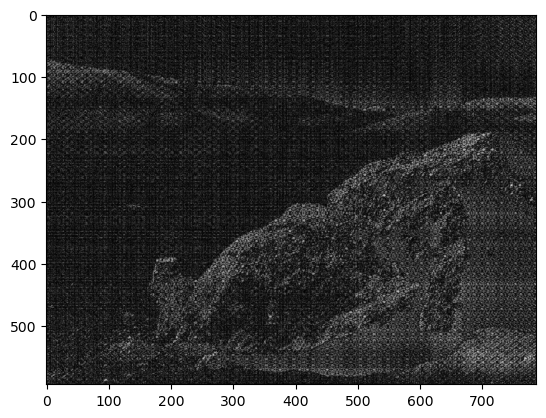

In [36]:
f_shift = np.fft.ifftshift(shift)
img_back = cv2.idft(f_shift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.imshow(img_back, cmap='gray')
# попытка не пытка